Alya Safadella Putri Akca\
221910892\
3SI1\
Tugas 10 APG

In [1]:
library(factoextra)
library(dendextend)
library(FactoClass)
library(openxlsx)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree


Loading required package: ade4

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



# 12.8

Using the distances in Example 12.4, cluster the items using the average linkage hierarchical procedure. Draw the dendrogram. Compare the
results with those in Examples 12.4 and 12.6.

In [2]:
D <- matrix(c(0, 9, 3, 6, 11, 9, 0, 7, 5, 10, 3, 7, 0, 9, 2, 6, 5, 9, 0, 8, 11, 10, 2, 8, 0),
            nrow = 5, ncol = 5)
D

0,9,3,6,11
9,0,7,5,10
3,7,0,9,2
6,5,9,0,8
11,10,2,8,0


Klasterisasi $average \space linkage$ menggunakan rataan dari jarak antara titik yang akan dikelompokan, sesuai dengan formula dari Johnson:
$$d_{(UV)W} = \displaystyle \frac{\sum_{i}\sum_{j} d_{ij}}{N_{(UV)}N_{W}}$$

dengan menggunakan formula di atas, proses pengklasterisasian adalah sebagai berikut:


In [3]:
as.dist(D)

   1  2  3  4
2  9         
3  3  7      
4  6  5  9   
5 11 10  2  8

Berdasarkan hasil tersebut, dapat diketahui bawha jarak terpendek setiap variabel ada di antara variabel 3 dan 5 (skor jarak = 2). Jadi, matriks baru dapat dibuat dengan menghitung jarak baru dari variabel 1, 2, dan 4 ke 3 dan 5.

In [4]:
d_35_to_1 <- (D[3, 1] + D[5, 1])/2
d_35_to_1

d_35_to_2 <- (D[3, 2] + D[5, 2])/2
d_35_to_2

d_35_to_4 <- (D[3, 4] + D[5, 4])/2
d_35_to_4

[1] 7

[1] 8.5

[1] 8.5

Berdasarkan hasil tersebut, diperoleh $d_{(35)1} = 7$, $d_{(35)2} = 8.5$, $d_{(35)3} = 8.5$. \
Matriks baru :

In [5]:
D_35 <- matrix(c(0, 9, 6, 7, 9, 0, 5, 8.5, 6, 5, 0, 8.5, 7, 8.5, 8.5, 0), 
               nrow = 4, ncol = 4)
colnames(D_35) <- c("1", "2", "4", "3&5")
rownames(D_35) <- c("1", "2", "4", "3&5")
D_35

,1,2,4,3&5
1,0,9.0,6.0,7.0
2,9,0.0,5.0,8.5
4,6,5.0,0.0,8.5
3&5,7,8.5,8.5,0.0


Deteksi kembali nilai jarak yang paling dekat pada matriks D_35

In [6]:
as.dist(D_35)

      1   2   4
2   9.0        
4   6.0 5.0    
3&5 7.0 8.5 8.5

Berdasarkan hasil tersebut, dapat diketahui bawha jarak terpendek setiap variabel ada di antara variabel 2 dan 4 (distance score = 5). Jadi, kita akan membuat matriks baru dengan menghitung jarak baru dari variabel 1 dan 3 & 5 ke 2 dan 4.

Oleh karena itu, lakukan hal yang sama dengan proses sebelumnya, yaitu mencari jarak terhadap matriks baru tersebut

In [7]:
d_24_to_1 <- (D_35[2, 1] + D_35[3, 1])/2
d_24_to_1

d_24_to_35 <- (D_35[4, 2] + D_35[4, 3])/2
d_24_to_35

[1] 7.5

[1] 8.5

Berdasarkan hasil tersebut, diperoleh nilai $d_{(24)1} = 7.5$ dan $d_{(24)35} = 8.5$ \
Matriks baru :

In [8]:
D_24 <- matrix(c(0, 7.5, 7, 7.5, 0, 8.5, 7, 8.5, 0), 
               nrow = 3, ncol = 3)
colnames(D_24) <- c("1", "2&4", "3&5")
rownames(D_24) <- c("1", "2&4", "3&5")
D_24

,1,2&4,3&5
1,0.0,7.5,7.0
2&4,7.5,0.0,8.5
3&5,7.0,8.5,0.0


Deteksi kembali nilai jarak yang paling dekat pada matriks D_24. 

In [9]:
as.dist(D_24)

      1 2&4
2&4 7.5    
3&5 7.0 8.5

Berdasarkan hasil tersebut, dapat diketahui bawha jarak terpendek setiap variabel ada di antara variabel 1 dan 3 & 5 (distance score = 7). Jadi, kita akan membuat matriks baru dengan menghitung jarak baru dari variabel 2 & 4 ke 1 dan 3 & 5.

Oleh karena itu, lakukan hal yang sama dengan proses sebelumnya, yaitu mencari jarak terhadap matriks baru tersebut

In [10]:
d_135_to_24 <- (D_24[2, 1] + D_24[3, 2])/2
d_135_to_24

[1] 8

dari hasi lperhitungan di atas, diperoleh nilai $d_{(24)1} = 8$ \
Matriks baru :

In [11]:
D_135 <- matrix(c(0, 8, 8, 0), 
               nrow = 2, ncol = 2)
colnames(D_135) <- c("1&3&5", "2&4")
rownames(D_135) <- c("1&3&5", "2&4")
D_135

,1&3&5,2&4
1&3&5,0,8
2&4,8,0


- Klaster berikutnya merupakan gabungan semua variabel dengan jarak sebesar 8

Jika perhitungan di atas dimuat dalam dendogram, hasilnya adalah sebagai berikut:

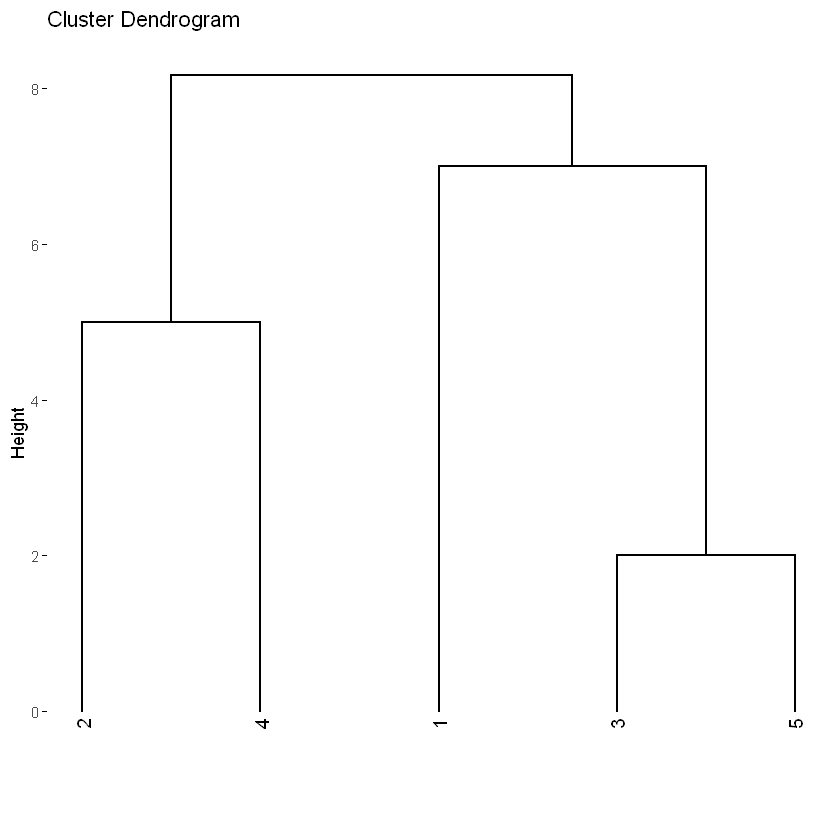

In [12]:
hc_data <- hclust(as.dist(D), method = "average")
fviz_dend(hc_data)

# 12.10

Use Ward’s method to cluster the 4 items whose measurements on a single variable X are given in the following table.

In [13]:
X <- c(2, 1, 5, 8)

## a. 	Initially, each item is a cluster and we have the clusters {1} {2} {3} {4}. Show that $$ESS = \sum_{j=1}^n (x_{j} - \bar{x})'(x_{j} - \bar{x})=0$$ as it must.

In [14]:
x_bar <- colMeans(t(X))
for(i in c(1:4)){
  print(sum(t(X[i] - x_bar[i]) %*% (X[i] - x_bar[i])))
}

[1] 0
[1] 0
[1] 0
[1] 0


Dari hasil di atas, terbukti bahwa ESS untuk klaster `{1}, {2}, {3}, dan {4}` bernilai 0.

## b. 	If we join clusters {1} and {2}, the new cluster {12} has $$ESS_1 = \sum_{j=1}^n (x_{j} - \bar{x})^2 = (2-1.5)^2+(1-1.5) = 5$$ and the ESS associated with the grouping {12}, {3}, {4} is $$ESS = .5+0+0=0.5$$. The increase in ESS (loss of information) from the first step to the current step in $$.5-0=.5$$. Complete the following table by determining the increase in ESS for all the possibilities at step 2.

In [15]:
ess_13_2_4 <- ((X[1] - mean(X[c(1, 3)]))^2 + (X[3] - mean(X[c(1, 3)]))^2) + 
              (X[2] - mean(X[2]))^2 + (X[4] - mean(X[4]))^2

ess_14_2_3 <- ((X[1] - mean(X[c(1, 4)]))^2 + (X[4] - mean(X[c(1, 4)]))^2) + 
              (X[2] - mean(X[2]))^2 + (X[3] - mean(X[3]))^2

ess_1_23_4 <- (X[1] - mean(X[1]))^2 + ((X[2] - mean(X[c(2, 3)]))^2 + 
              (X[3] - mean(X[c(2, 3)]))^2) + (X[4] - mean(X[4]))^2

ess_1_24_3 <- (X[1] - mean(X[1]))^2 + ((X[2] - mean(X[c(2, 4)]))^2 + 
              (X[4] - mean(X[c(2, 4)]))^2) + (X[3] - mean(X[3]))^2

ess_1_2_34 <- (X[1] - mean(X[1]))^2 + (X[2] - mean(X[2]))^2 + 
              ((X[3] - mean(X[c(3, 4)]))^2 + (X[4] - mean(X[c(3, 4)]))^2)

ess <- rbind(ess_13_2_4, ess_14_2_3, ess_1_23_4, ess_1_24_3, ess_1_2_34)
ess


ess_13_2_4,4.5
ess_14_2_3,18.0
ess_1_23_4,8.0
ess_1_24_3,24.5
ess_1_2_34,4.5


In [16]:
## Increase ESS
ess_inc <- c()
ess_temp <- 5
for(i in c(1:5)){
  ess_temp <- ess[i] - ess_temp
  ess_inc <- append(ess_inc, ess_temp)
}
as.data.frame(ess_inc)

ess_inc
<dbl>
-0.5
18.5
-10.5
35.0
-30.5


## c. Complete the last two steps, and construct the dendrogram showing the values of ESS at which the mergers take place

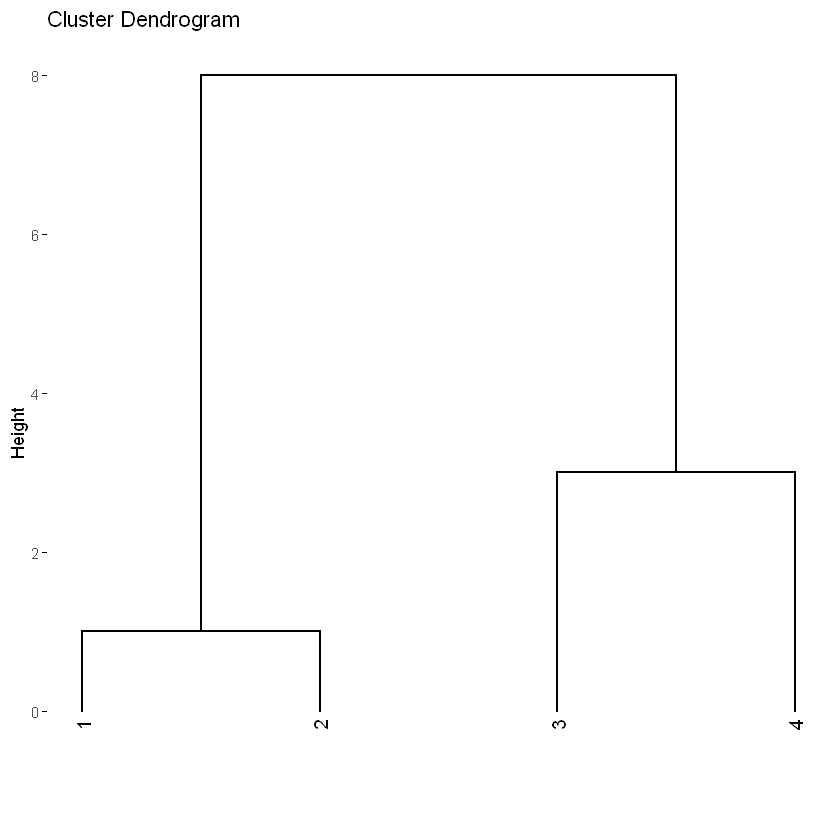

In [17]:
hc_ward <- hclust(dist(X), method = "ward.D")
fviz_dend(hc_ward)

# 12.12

Repeat Example 12.12, starting with the initial groups (AC) and (BD) . Compare your solution with the solution in the example. Are they the same? Graph the items in terms of their (x1 , x2) coordinates, and comment on the solutions.

In [18]:
#Example 12.12
x1 <- c(5, -1, 1, -3)
x2 <- c(3, 1, -2, -2)
obs <- cbind(as.numeric(x1), as.numeric(x2))
as.data.frame(obs)
str(obs)

V1,V2
<dbl>,<dbl>
5,3
-1,1
1,-2
-3,-2


 num [1:4, 1:2] 5 -1 1 -3 3 1 -2 -2


Selanjutnya, dilakukan penghitungan inisialisasi dari centroid cluster (mean) yang akan dibangun dengan kombinasi pengelompokan $(AC)$ dan $(BD)$

In [19]:
AC_xbar1 <- (obs[1, 1] + obs[3, 1])/2
AC_xbar2 <- (obs[1, 2] + obs[3, 2])/2
BD_xbar1 <- (obs[2, 1] + obs[4, 1])/2
BD_xbar2 <- (obs[2, 2] + obs[4, 2])/2

cent <- matrix(c(AC_xbar1, BD_xbar1, AC_xbar2, BD_xbar2), nrow = 2, ncol = 2)
colnames(cent) <- c("xbar1", "xbar2")
rownames(cent) <- c("(AC)", "(BD)")
cent

,xbar1,xbar2
(AC),3,0.5
(BD),-2,-0.5


Jarak dihitung antara titik A dan B ke centroid yang telah dihitung sebelumnya menggunakan metode Eucledian Distance

In [20]:
d2_A_AC <- (obs[1, 1] - cent[1, 1])^2  + (obs[1, 2] - cent[1, 2])^2
d2_A_BD <- (obs[1, 1] - cent[2, 1])^2  + (obs[1, 2] - cent[2, 2])^2
d2_B_AC <- (obs[2, 1] - cent[1, 1])^2  + (obs[2, 2] - cent[1, 2])^2
d2_B_BD <- (obs[2, 1] - cent[2, 1])^2  + (obs[2, 2] - cent[2, 2])^2

rbind(d2_A_AC, d2_A_BD, d2_B_AC, d2_B_BD)

d2_A_AC,10.25
d2_A_BD,61.25
d2_B_AC,16.25
d2_B_BD,3.25


Dari hasil tersebut, dapat dilihat bahwa jarak terkecil antara titik B dengan centroid (BD) adalah klaster $(BCD)$ sehingga klaster baru dapat terbentuk dengan koordinat centroidnya :

In [21]:
BCD_xbar1 <- (obs[2, 1] + obs[3, 1] + obs[4, 1])/3
BCD_xbar2 <- (obs[2, 2] + obs[3, 2] + obs[4, 2])/3

cent_new <- matrix(c(obs[1, 1], BCD_xbar1, obs[1, 2],  BCD_xbar2), nrow = 2, ncol = 2)
colnames(cent_new) <- c("xbar1", "xbar2")
rownames(cent_new) <- c("(A)", "(BCD)")
cent_new

,xbar1,xbar2
(A),5,3
(BCD),-1,-1


Berdasarkan hasil tersebut, dapat dilihat bahwa koordinat centroid xbar1 dan xbar2 sama dengan hasil pada contoh 12.2

# 12.16

The national track records data for women are given in Table 1 .9.

In [22]:
nat_rec <- read.xlsx("National Track Records for Women.xlsx")

for(i in c(2:8)){
  nat_rec[, i] <- as.numeric(nat_rec[, i])
}
nat_rec

,COUNTRY,100m,200m,400m,800m,1500m,3000m,Marathon
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,argentin,11.61,22.94,54.50,2.15,4.43,9.79,178.52
2,australi,11.20,22.35,51.08,1.98,4.13,9.08,152.37
3,austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
4,belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
5,bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98
6,brazil,11.31,23.17,52.80,2.10,4.49,9.77,168.75
7,burma,12.14,24.47,55.00,2.18,4.45,9.51,191.02
8,canada,11.00,22.25,50.06,2.00,4.06,8.81,149.45
9,chile,12.00,24.52,54.90,2.05,4.23,9.37,171.38


## a. Using the data in Table 1.9, calculate the Euclidean distances between pairs of countries.

In [23]:
D_nat_rec <- dist(nat_rec[, c(2:8)])
D_nat_rec

             1           2           3           4           5           6
2   26.3942816                                                            
3   19.5474807   7.0631367                                                
4   20.8442702   5.6069154   2.1061339                                    
5    8.6272359  17.7866776  10.9606752  12.2439209                        
6    9.9243287  16.5096154   9.6450765  10.9727617   1.3465140            
7   12.6175077  38.9216418  31.9911441  33.3519430  21.1697355  22.4331763
8   29.4405588   3.1136795   9.9958541   8.6675891  20.8356929  19.5462682
9    7.3494558  19.5299872  12.8426204  13.9377222   2.7019808   3.7223111
10  10.1756720  16.7204426  10.1955137  11.1451200   2.7290108   2.6394318
11  13.2056124  13.3471757   6.6689429   7.7616235   4.6792307   3.4913178
12  55.2066699  81.5703641  74.6410745  75.9961117  63.7960422  65.0695420
13   7.9104172  20.8986076  14.7217832  15.4641295   5.5555648   6.4773606
14  20.7703852   7.192273

## b.	Treating the distances in (a) as measures of (dis)similarity, cluster the countries using the single linkage and complete linkage hierarchical procedures. Construct dendrograms and compare the results.

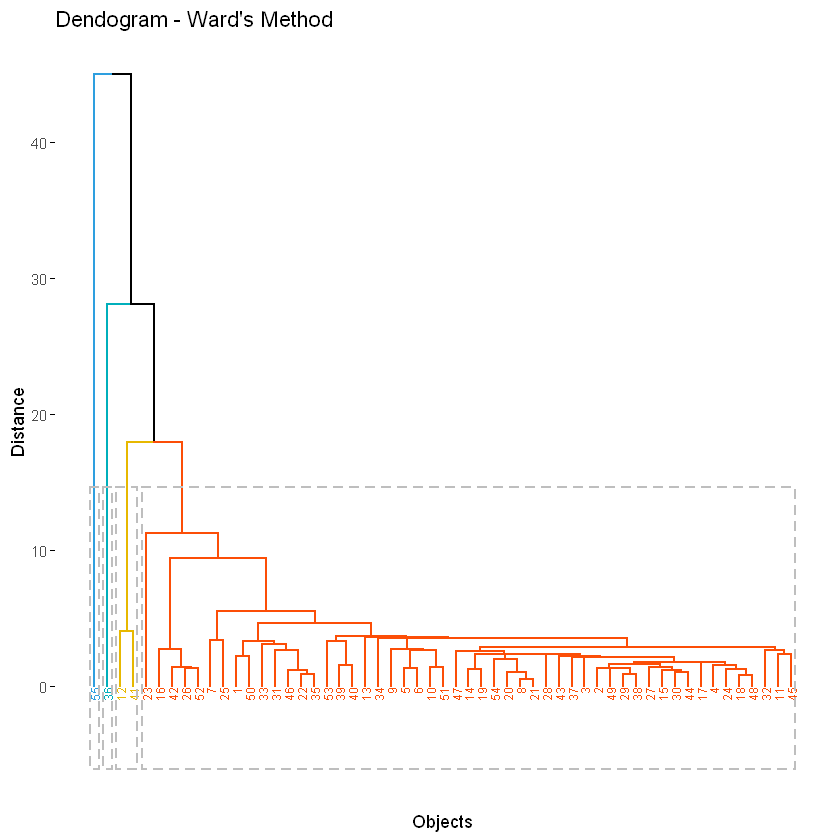

In [24]:
hc_single <- hclust(D_nat_rec, method = "single")
fviz_dend(hc_single, cex = 0.5,
          k = 4,
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
          color_labels_by_k = T,
          rect = T,
          main = "Dendogram - Ward's Method",
          xlab = "Objects", ylab = "Distance", sub = "")

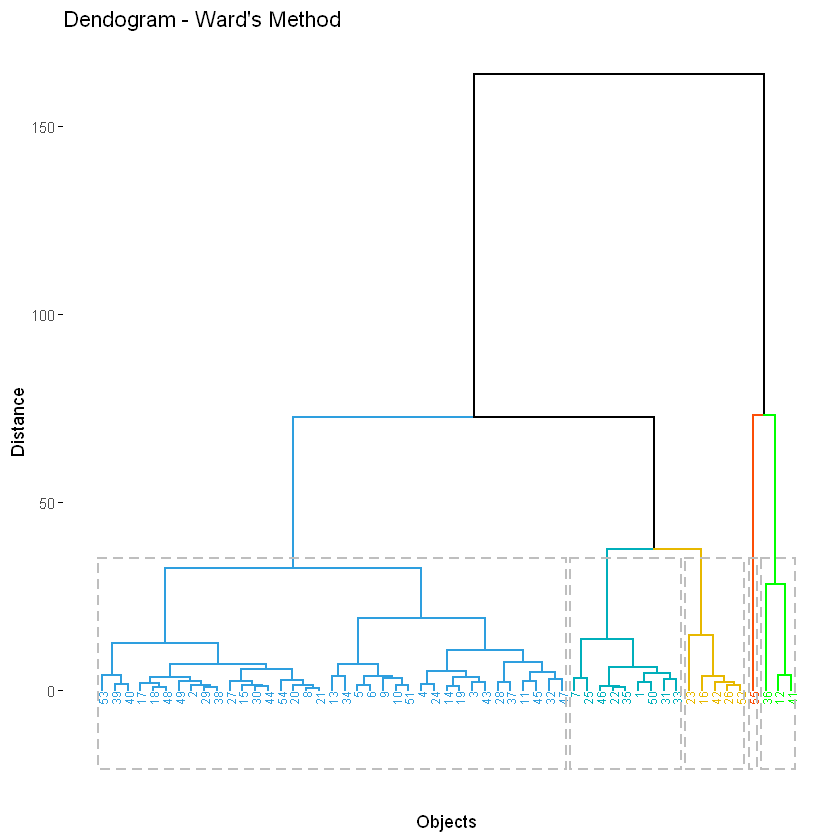

In [25]:
hc_complete <- hclust(D_nat_rec, method = "complete")
fviz_dend(hc_complete, cex = 0.5,
          k = 5,
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#00ff00"),
          color_labels_by_k = T,
          rect = T,
          main = "Dendogram - Ward's Method",
          xlab = "Objects", ylab = "Distance", sub = "")

## c.	Input the data in Table 1.9 into a K-means clustering program. Cluster the countries into groups using several values of K. Compare the results with those in Part b.

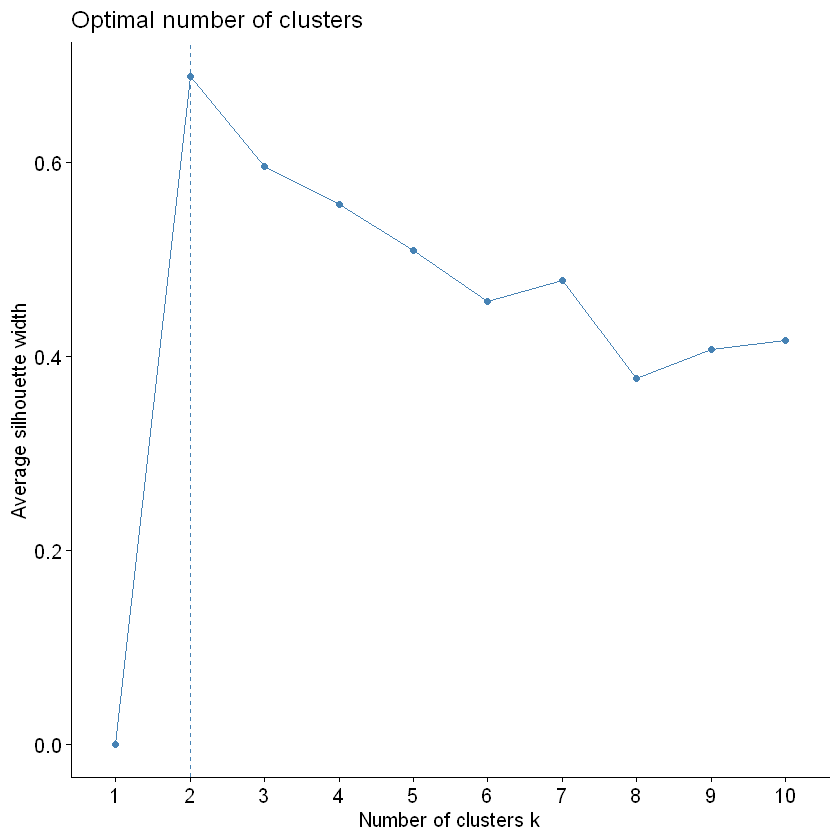

In [26]:
fviz_nbclust(nat_rec[, c(2:8)], kmeans)

Dari diagram tersebut, dapat ditentukan kandidat jumlah klaster yang bisa kita bentuk dari data yang digunakan. Kandidat tersebut adalah 2 klaster dan 3 klaster.

In [27]:
for(i in c(2:8)){
  nat_rec[, i] <- as.numeric(nat_rec[, i])
}

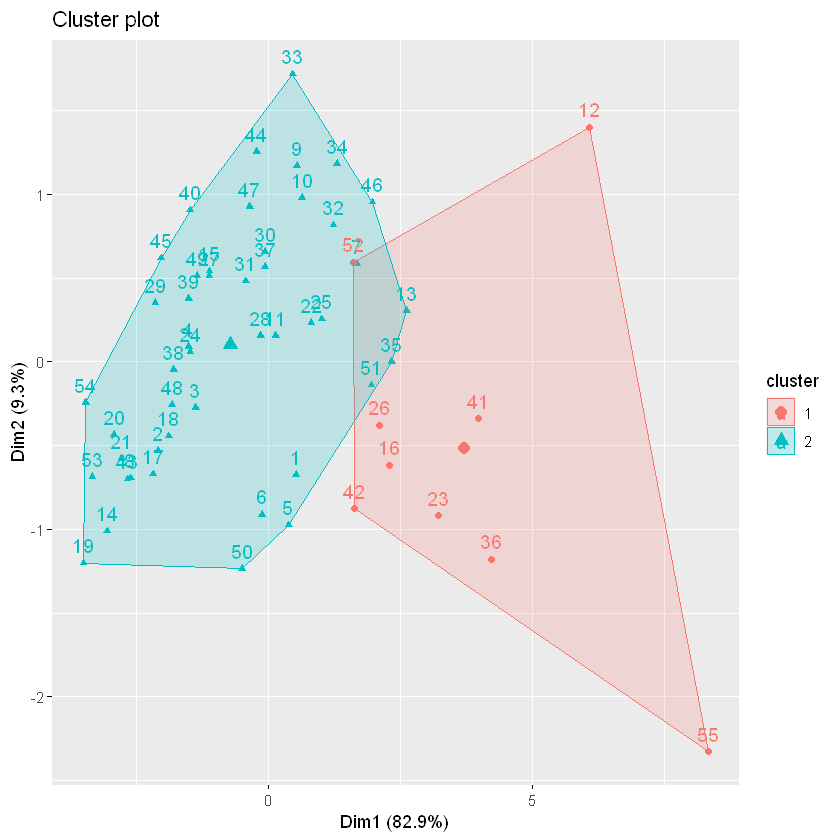

In [28]:
# 2 Kluster
km_nat_rec <- kmeans(nat_rec[, c(2:8)], centers = 2)
fviz_cluster(km_nat_rec, data = as.data.frame(nat_rec[, c(2:8)]))

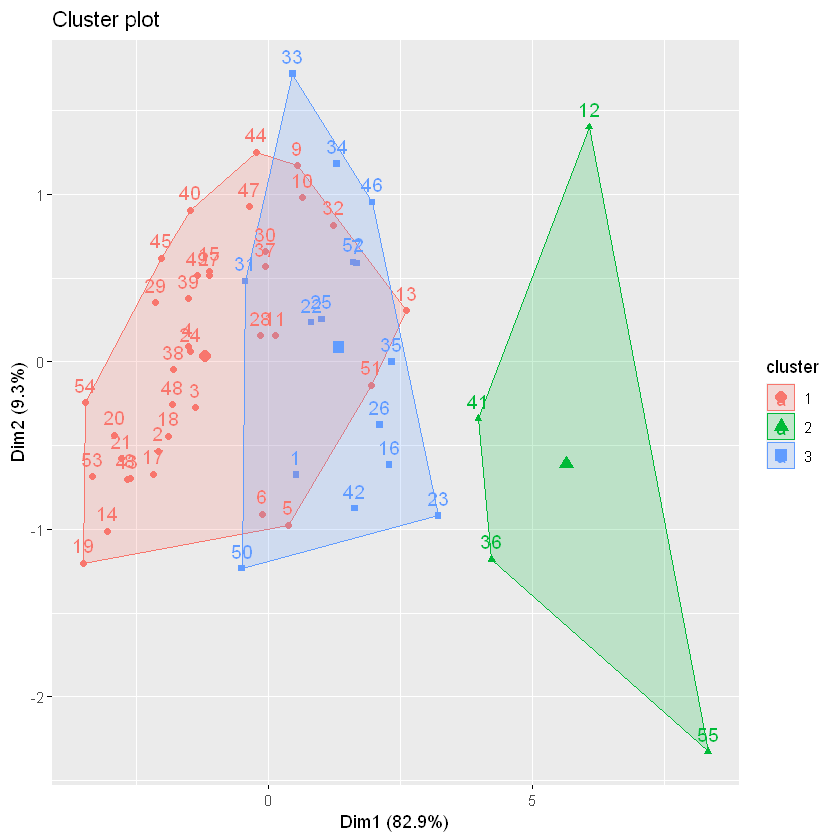

In [29]:
# 3 Kluster
km_nat_rec <- kmeans(nat_rec[, c(2:8)], centers = 3)#, nstart = 25)
fviz_cluster(km_nat_rec, data = as.data.frame(nat_rec[, c(2:8)]))